In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instruction to the notebook stating warning should not be displayed
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
lego = files.upload()

Saving lego_sets.csv to lego_sets.csv


In [3]:
df = pd.read_csv("lego_sets.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [5]:
# Perform EDA
df['ages'].unique() # which age category it belongs

array(['6-12', '12+', '7-12', '10+', '5-12', '8-12', '4-7', '4-99', '4+',
       '9-12', '16+', '14+', '9-14', '7-14', '8-14', '6+', '2-5', '1½-3',
       '1½-5', '9+', '5-8', '10-21', '8+', '6-14', '5+', '10-16', '10-14',
       '11-16', '12-16', '9-16', '7+'], dtype=object)

In [6]:
df['list_price'].unique() #price per set

array([  29.99  ,   19.99  ,   12.99  ,   99.99  ,   79.99  ,   59.99  ,
         49.99  ,   39.99  ,   34.99  ,  159.99  ,    9.99  ,  199.99  ,
        149.99  ,  119.99  ,   89.99  ,   69.99  ,   24.99  ,   15.99  ,
         14.99  ,    6.99  ,   16.99  ,    7.99  ,    4.99  ,    2.49  ,
        369.99  ,  169.99  ,  279.99  ,  249.99  ,  239.99  ,  139.99  ,
        269.99  ,  129.99  ,   44.99  ,   11.99  ,  349.99  ,    5.99  ,
        109.99  ,   54.99  ,   32.99  ,  197.99  ,   88.99  ,   41.99  ,
         31.99  ,   26.99  ,   21.99  ,    3.99  ,  299.99  ,  754.99  ,
        484.99  ,   36.99  ,  789.99  ,  499.99  ,   84.99  ,  799.99  ,
        289.99  ,  179.99  ,  113.9924,   75.9924,   60.7924,   53.1924,
         45.5924,   37.9924,  189.9924,   30.3924,   22.7924,   12.1524,
        227.9924,  174.7924,  121.5924,   34.1924,   18.9924,   17.4724,
         13.6724,    7.5924,   15.1924,    9.8724,    6.0724,    2.2724,
         91.1924,  379.9924,  303.9924,  288.7924, 

In [7]:
df['num_reviews'].unique()  # No of reviews per set. Contains null values

array([  2.,  11.,  23.,  14.,   7.,  37.,  24.,  53.,  63.,  13.,   1.,
         3.,   5.,  nan,   4.,   6.,   8.,   9.,  10.,  12.,  35.,  45.,
        16.,  89.,  47.,  85.,  40.,  30.,  46., 180.,  27.,  15.,  43.,
        62.,  51.,  99.,  64., 228.,  91., 115., 202., 177., 337.,  66.,
       134.,  77.,  19.,  18.,  32., 171.,  52.,  22.,  17., 130.,  83.,
        79., 367.,  33.,  25.,  38.,  26.,  88.,  29.,  21.,  28.,  84.,
       201.,  31.,  39.,  71.,  56.,  86., 197.,  36.,  94.,  67.,  70.,
       143.,  75.,  57.,  20., 142.,  61.,  87.,  34., 198.,  54.])

In [8]:
df['piece_count'].unique() # number of pieces in each set

array([2.770e+02, 1.680e+02, 7.400e+01, 1.032e+03, 7.440e+02, 5.970e+02,
       5.980e+02, 7.800e+02, 4.680e+02, 4.440e+02, 3.860e+02, 3.210e+02,
       3.610e+02, 8.470e+02, 7.080e+02, 2.340e+02, 1.600e+02, 1.490e+02,
       1.410e+02, 1.010e+02, 1.050e+02, 1.130e+02, 1.360e+02, 9.100e+01,
       1.400e+02, 1.430e+02, 1.220e+02, 1.300e+02, 1.190e+02, 1.350e+02,
       1.080e+02, 2.400e+02, 2.090e+02, 1.260e+02, 1.020e+02, 8.900e+01,
       1.180e+02, 1.270e+02, 9.600e+01, 1.090e+02, 9.300e+01, 1.390e+02,
       1.160e+02, 1.510e+02, 9.900e+01, 3.870e+02, 8.880e+02, 6.100e+02,
       1.250e+03, 7.920e+02, 8.130e+02, 8.940e+02, 8.830e+02, 9.190e+02,
       6.630e+02, 7.400e+02, 5.610e+02, 4.260e+02, 3.030e+02, 4.150e+02,
       3.740e+02, 3.370e+02, 2.940e+02, 1.690e+02, 3.470e+02, 2.970e+02,
       3.780e+02, 2.570e+02, 3.440e+02, 3.100e+02, 2.140e+02, 1.920e+02,
       2.490e+02, 2.400e+01, 2.390e+02, 1.900e+02, 1.740e+02, 1.440e+02,
       1.150e+02, 2.010e+02, 8.000e+00, 2.000e+00, 

In [9]:
df['play_star_rating'].unique() # Ratings. Contains null values

array([4. , 4.3, 3.6, 3.2, 3.7, 4.4, 4.1, 4.2, 3.8, 4.7, 3. , 5. , 2. ,
       nan, 4.6, 2.7, 4.5, 1. , 3.5, 3.3, 3.9, 4.8, 2.9, 3.4, 4.9, 2.5,
       2.2, 2.3, 2.8, 3.1, 2.1])

In [10]:
df['review_difficulty'].unique() # Predicts difficulty level of set. Contains null value

array(['Average', 'Easy', 'Challenging', 'Very Easy', nan,
       'Very Challenging'], dtype=object)

In [35]:
r = df['review_difficulty'].mode()
print(r)

0    Easy
dtype: object


In [11]:
df['star_rating'].unique()  # Ratings . Contains null value

array([4.5, 5. , 4.3, 4.6, 4.9, 4.2, 4.7, 4.8, 4.4, 3.4, 3. , 4. , nan,
       3.7, 3.3, 4.1, 3.9, 2.5, 3.8, 3.5, 3.6, 3.2, 2.6, 2.2, 2.7, 2.8,
       1.8, 2.9])

In [12]:
df['theme_name'].unique() # Display which theme it belongs. Contains null values

array(['Angry Birds™', 'Architecture', 'BOOST', 'BrickHeadz', 'City',
       'Juniors', 'Classic', 'Creator 3-in-1', 'Creator Expert',
       'THE LEGO® BATMAN MOVIE', 'DC Comics™ Super Heroes', 'DIMENSIONS™',
       'DC Super Hero Girls', 'Disney™', 'DUPLO®', 'Elves', 'Friends',
       'Ghostbusters™', 'Ideas', 'Indoraptor Rampage at Lockwood Estate',
       'Carnotaurus Gyrosphere Escape', 'T. rex Transport',
       'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack',
       "Blue's Helicopter Pursuit", 'Stygimoloch Breakout',
       'Pteranodon Chase', 'Marvel Super Heroes', 'MINDSTORMS®',
       'Minecraft™', 'Minifigures', 'NEXO KNIGHTS™',
       'THE LEGO® NINJAGO® MOVIE™', 'NINJAGO®', 'SERIOUS PLAY®',
       'Speed Champions', 'Star Wars™', 'Technic', 'Power Functions',
       'LEGO® Creator 3-in-1', nan], dtype=object)

In [34]:
a = df['theme_name'].mode()
print(a)

0    Star Wars™
dtype: object


In [13]:
df['val_star_rating'].unique() # Ratings. Contains null values

array([4. , 4.1, 4.3, 4.4, 4.5, 3.6, 4.2, 3.5, 4.8, 5. , nan, 4.7, 3. ,
       4.6, 4.9, 3.8, 3.3, 2.5, 2.7, 2.2, 2.3, 2.8, 2. , 2.9, 3.2, 3.9,
       3.4, 2.6, 3.7, 1. , 1.8, 2.4, 1.9, 3.1])

In [14]:
df['country'].unique() # Country name

array(['US', 'AU', 'AT', 'BE', 'CA', 'CH', 'CZ', 'DE', 'DN', 'ES', 'FI',
       'FR', 'GB', 'IE', 'IT', 'LU', 'NO', 'NL', 'NZ', 'PL', 'PT'],
      dtype=object)

In [15]:
# 1. Check null values
df.isnull().sum()

ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_desc             377
prod_id                 0
prod_long_desc          0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
val_star_rating      1795
country                 0
dtype: int64

In [16]:
#Replace nan with mean
df['num_reviews'].fillna(df['num_reviews'].mean(), inplace=True)

In [17]:
df['num_reviews'].unique()

array([  2.        ,  11.        ,  23.        ,  14.        ,
         7.        ,  37.        ,  24.        ,  53.        ,
        63.        ,  13.        ,   1.        ,   3.        ,
         5.        ,  16.82623814,   4.        ,   6.        ,
         8.        ,   9.        ,  10.        ,  12.        ,
        35.        ,  45.        ,  16.        ,  89.        ,
        47.        ,  85.        ,  40.        ,  30.        ,
        46.        , 180.        ,  27.        ,  15.        ,
        43.        ,  62.        ,  51.        ,  99.        ,
        64.        , 228.        ,  91.        , 115.        ,
       202.        , 177.        , 337.        ,  66.        ,
       134.        ,  77.        ,  19.        ,  18.        ,
        32.        , 171.        ,  52.        ,  22.        ,
        17.        , 130.        ,  83.        ,  79.        ,
       367.        ,  33.        ,  25.        ,  38.        ,
        26.        ,  88.        ,  29.        ,  21.  

In [18]:
#Replace nan with mean
df['play_star_rating'].fillna(df['play_star_rating'].mean(), inplace=True)

In [19]:
#Replace nan with mean
df['star_rating'].fillna(df['star_rating'].mean(), inplace=True)

In [20]:
#Replace nan with mean
df['val_star_rating'].fillna(df['val_star_rating'].mean(), inplace=True)

In [54]:
#Replace nan with modal
df['review_difficulty'].fillna(df['review_difficulty'].mode()[0], inplace=True)

In [55]:
#Replace nan with modal
df['theme_name'].fillna(df['theme_name'].mode()[0], inplace=True)

In [56]:
#Replace nan with modal
df['prod_desc'].fillna(df['prod_desc'].mode()[0], inplace=True)

In [57]:
df.isnull().sum() # no null values

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
prod_desc            0
prod_id              0
prod_long_desc       0
review_difficulty    0
set_name             0
star_rating          0
theme_name           0
val_star_rating      0
country              0
dtype: int64

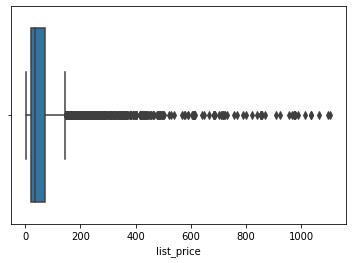

In [38]:
# 2. No junk values
# 3. Outilers

sns.boxplot(data=df, x= "list_price")
plt.show()

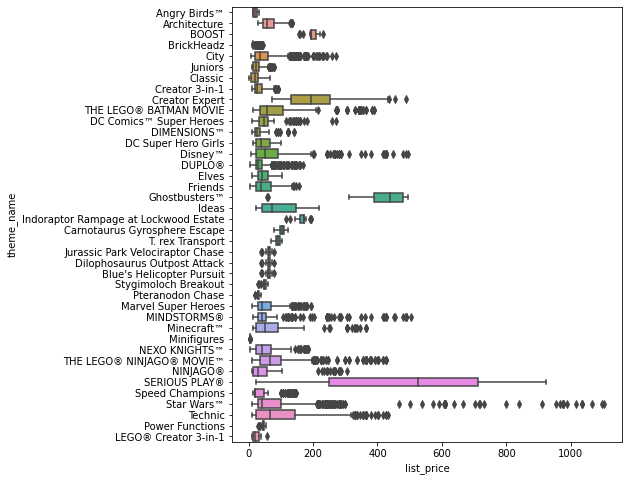

In [49]:
plt.figure(figsize=(7,8))
sns.boxplot(data=df, x="list_price", y="theme_name")
plt.show()

In [47]:
df[(df['theme_name']=='Architecture') & (df['list_price']>140)]

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
6133,12+,146.339,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,FI
9494,12+,155.870,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,NO


In [48]:
df.drop([6133, 9494], inplace=True)

In [50]:
# 4. Multiple outliers so reduce skewness
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [51]:
df_cat.head()

,ages,prod_desc,prod_long_desc,review_difficulty,set_name,theme_name,country
0,6-12,Catapult into action and take back the eggs fr...,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,Angry Birds™,US
1,6-12,Launch a flying attack and rescue the eggs fro...,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,Angry Birds™,US
2,6-12,Chase the piggy with lightning-fast Chuck and ...,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,Angry Birds™,US
3,12+,Explore the architecture of the United States ...,Discover the architectural secrets of the icon...,Average,United States Capitol Building,Architecture,US
4,12+,Recreate the Solomon R. Guggenheim Museum® wit...,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,Architecture,US


In [52]:
df_num.head()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
0,29.99,2.0,277.0,4.0,75823.0,4.5,4.0
1,19.99,2.0,168.0,4.0,75822.0,5.0,4.0
2,12.99,11.0,74.0,4.3,75821.0,4.3,4.1
3,99.99,23.0,1032.0,3.6,21030.0,4.6,4.3
4,79.99,14.0,744.0,3.2,21035.0,4.6,4.1


list_price : 4.681047233136546


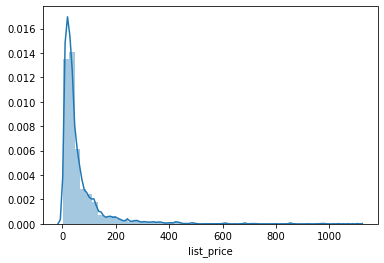

---------------------------------
num_reviews : 5.648181118812222


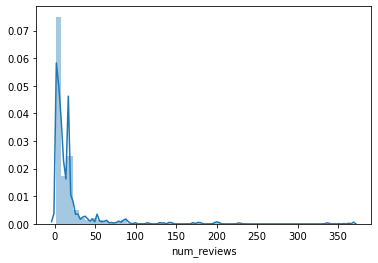

---------------------------------
piece_count : 3.9679362541993797


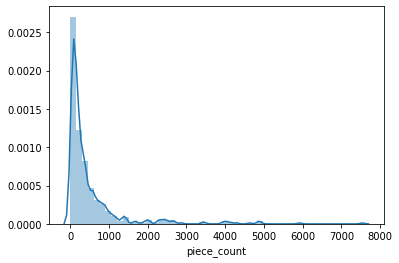

---------------------------------
play_star_rating : -1.809458054002011


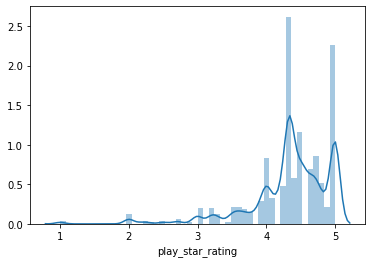

---------------------------------
prod_id : 11.420017348599403


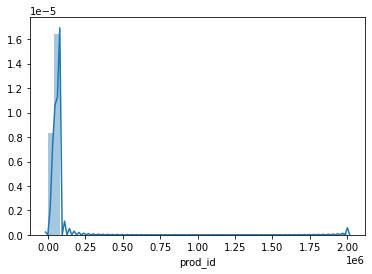

---------------------------------
star_rating : -1.7218368857169932


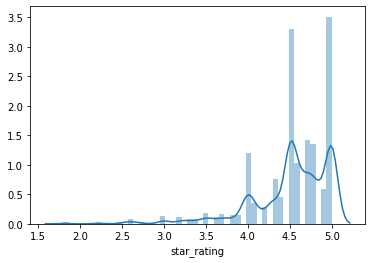

---------------------------------
val_star_rating : -1.3169739257366848


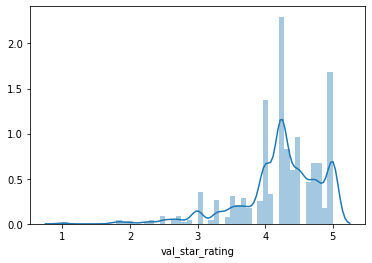

---------------------------------


In [53]:
from scipy.stats import skew
for col in df_num:
  print(col, ":", skew(df_num[col]))
  sns.distplot(df_num[col])
  plt.show()
  print("---------------------------------")

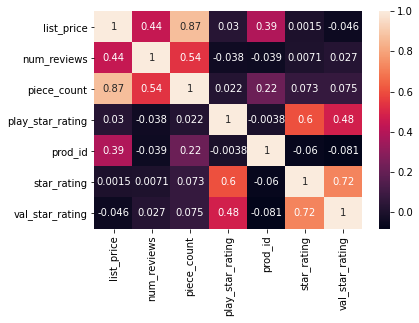

In [58]:
# Check the skew values and identify the columns with skew>0.5 and correlate them with target
sns.heatmap(df_num.corr(), annot=True)
plt.show()

In [59]:
# piece_count  is higly corrrelated with price, so we skip it
# we consider num reviews
# check for -ve values
df_num['num_reviews'].min()

1.0

2.5274562417052344


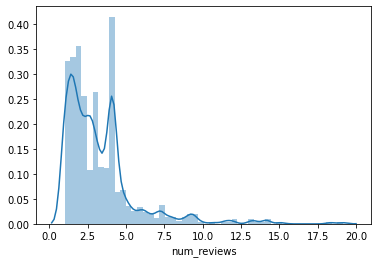

In [60]:
# no -ve values
df_num['num_reviews'] = np.sqrt(df_num['num_reviews'])
print(skew(df_num['num_reviews']))
sns.distplot(df_num['num_reviews'])
plt.show()

0.8810296828179109


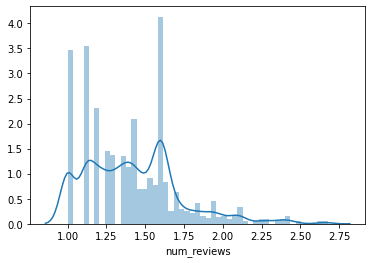

In [61]:
df_num['num_reviews'] = np.cbrt(df_num['num_reviews'])
print(skew(df_num['num_reviews']))
sns.distplot(df_num['num_reviews'])
plt.show()

0.2860909677178749


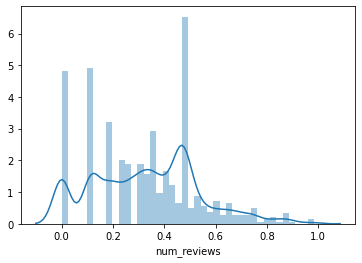

In [62]:
df_num['num_reviews'] = np.log(df_num['num_reviews'])
print(skew(df_num['num_reviews']))
sns.distplot(df_num['num_reviews'])
plt.show()

-7.121885183870573


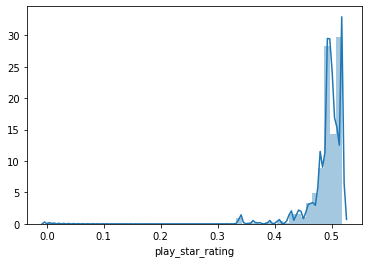

In [111]:
df_num['play_star_rating'] = np.sqrt(df_num['play_star_rating'])
print(skew(df_num['play_star_rating']))
sns.distplot(df_num['play_star_rating'])
plt.show()

In [71]:
# 5. Handling categorical data
# One Hot encoding

df['review_difficulty'].unique()

array(['Average', 'Easy', 'Challenging', 'Very Easy', 'Very Challenging'],
      dtype=object)

In [72]:
make_data = pd.get_dummies(df_cat['review_difficulty'])
make_data.head(10)

,Average,Challenging,Easy,Very Challenging,Very Easy
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [79]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col].astype(str))
df_cat.head()

,ages,prod_desc,prod_long_desc,review_difficulty,set_name,theme_name,country
0,11,81,950,0,93,0,20
1,11,413,599,2,483,0,20
2,11,103,605,2,482,0,20
3,26,225,176,0,706,1,20
4,26,531,174,1,574,1,20


In [81]:
# Scaling Data
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,ages,prod_desc,prod_long_desc,review_difficulty,set_name,theme_name,country
0,29.99,0.115525,277.0,0.231049,75823.0,0.250680,4.0,11,81,950,0,93,0,20
1,19.99,0.115525,168.0,0.231049,75822.0,0.268240,4.0,11,413,599,2,483,0,20
2,12.99,0.399649,74.0,0.243103,75821.0,0.243103,4.1,11,103,605,2,482,0,20
3,99.99,0.522582,1032.0,0.213489,21030.0,0.254343,4.3,26,225,176,0,706,1,20
4,79.99,0.439843,744.0,0.193858,21035.0,0.254343,4.1,26,531,174,1,574,1,20


In [82]:
df_mm = df_new.copy()
df_ss = df_new.copy()

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mm = MinMaxScaler()
mm.fit_transform(df_mm[['num_reviews']])

array([[0.1173759 ],
       [0.1173759 ],
       [0.40605391],
       ...,
       [0.48944871],
       [0.        ],
       [0.40605391]])

In [85]:
ss = StandardScaler()
ss.fit_transform(df_ss[['num_reviews']])

array([[-1.01965737],
       [-1.01965737],
       [ 0.34143046],
       ...,
       [ 0.73462858],
       [-1.57307297],
       [ 0.34143046]])

In [86]:
for col in df_mm:
  mm = MinMaxScaler()
  df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,ages,prod_desc,prod_long_desc,review_difficulty,set_name,theme_name,country
0,0.025138,0.117376,0.036605,0.861353,0.037600,0.896872,0.750,0.366667,0.110807,0.962513,0.0,0.125676,0.000,1.0
1,0.016069,0.117376,0.022149,0.861353,0.037600,1.000000,0.750,0.366667,0.564979,0.606890,0.4,0.652703,0.000,1.0
2,0.009720,0.406054,0.009682,0.906288,0.037599,0.852373,0.775,0.366667,0.140903,0.612969,0.4,0.651351,0.000,1.0
3,0.088625,0.530957,0.136737,0.795889,0.010201,0.918385,0.825,0.866667,0.307798,0.178318,0.0,0.954054,0.025,1.0
4,0.070486,0.446892,0.098541,0.722706,0.010204,0.918385,0.775,0.866667,0.726402,0.176292,0.2,0.775676,0.025,1.0


In [87]:
for col in df_ss:
  ss = StandardScaler()
  df_ss[col] = ss.fit_transform(df_ss[[col]])
df_ss.head()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating,ages,prod_desc,prod_long_desc,review_difficulty,set_name,theme_name,country
0,-0.382027,-1.019657,-0.262086,-0.389433,0.097547,0.030035,-0.375290,-0.281814,-1.363924,1.576954,-1.112838,-1.372639,-1.712248,1.614281
1,-0.490750,-1.019657,-0.394148,-0.389433,0.097541,0.889864,-0.375290,-0.281814,0.192882,0.342801,0.006070,0.484200,-1.712248,1.614281
2,-0.566855,0.341430,-0.508037,0.023520,0.097535,-0.340976,-0.211371,-0.281814,-1.260762,0.363898,0.006070,0.479438,-1.712248,1.614281
3,0.379027,0.930337,0.652655,-0.991045,-0.236929,0.209401,0.116466,1.578316,-0.688683,-1.144512,-1.112838,1.545930,-1.628832,1.614281
4,0.161583,0.533977,0.303721,-1.663590,-0.236898,0.209401,-0.211371,1.578316,0.746205,-1.151544,-0.553384,0.917462,-1.628832,1.614281


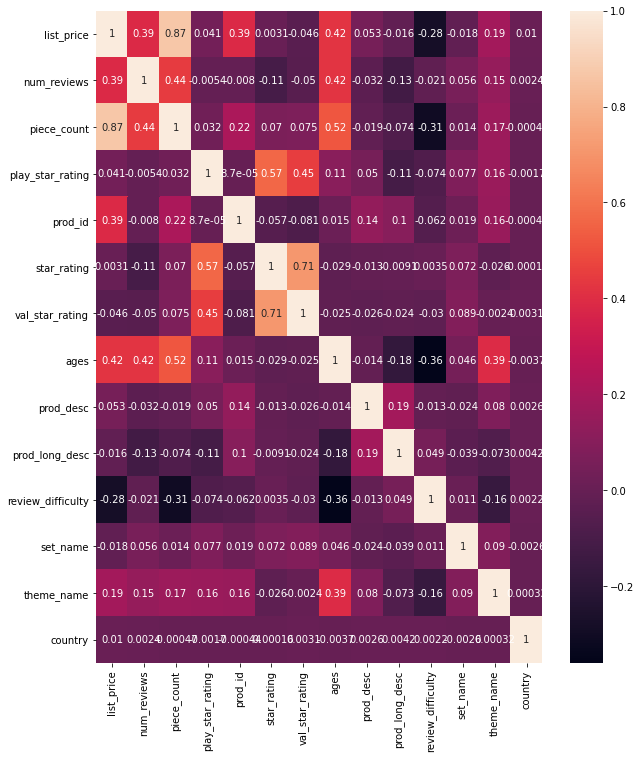

In [88]:
# Implement Linear Regression
plt.figure(figsize=(10,12))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

In [89]:
x = df_new[['piece_count']]
y = df_new['list_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)
y_hat = lr.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
residuals = y_test - y_hat
r2_score(y_test, y_hat)

Slope =  [0.09573986]
Intercept =  17.52983822261269


0.7356603700305224

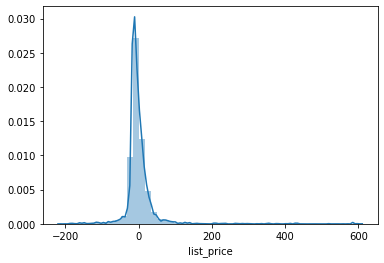

In [90]:
sns.distplot(residuals)
plt.show()

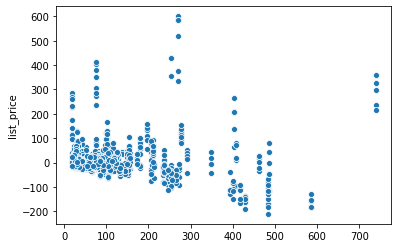

In [91]:
sns.scatterplot(y_hat, residuals)
plt.show()

In [92]:
sns.pairplot(df_new)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

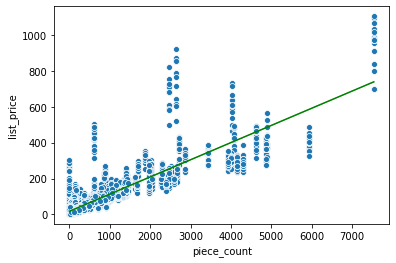

In [93]:
sns.scatterplot(data=df_new, x="piece_count", y="list_price")
sns.lineplot(x_test['piece_count'].to_list(), y_hat, color="green")
plt.show()

In [94]:
# Feature Engineering
df_new['rating'] = df_new['play_star_rating'] * df_new['val_star_rating']

In [108]:
x = df_new[['num_reviews','piece_count', 'rating']]
y = df_new['list_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope = ", lr.coef_)
print("Intercept = ", lr.intercept_)
y_hat = lr.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
residuals = y_test - y_hat
r2_score(y_test, y_hat)

Slope =  [  0.93168368   0.09487843 -28.18863236]
Intercept =  46.37033782840692


0.764029636168146

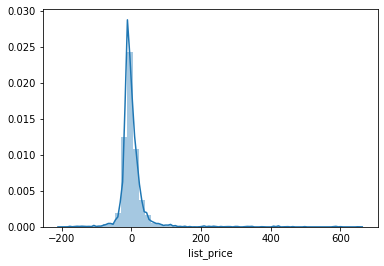

In [109]:
sns.distplot(residuals)
plt.show()

In [113]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x = df_new[['num_reviews','rating','piece_count']]
y = df_new['list_price']
pf = PolynomialFeatures(2) #Degree 2, theta0, x0, x1,x2
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

MSE = 1580.3752355167242 
 R2 = 0.8055634593369333


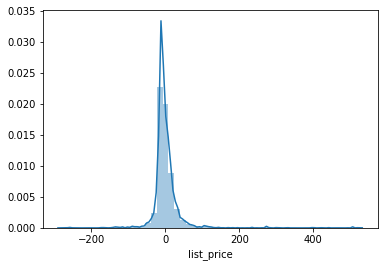

In [114]:
sns.distplot(residuals)
plt.show()

In [110]:
x = df_new[['num_reviews','piece_count']]
y = df_new['list_price']
pf = PolynomialFeatures(3) #Degree 3, theta0, x0, x1,x2
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

MSE = 2169.591456551802 
 R2 = 0.7281938346194377


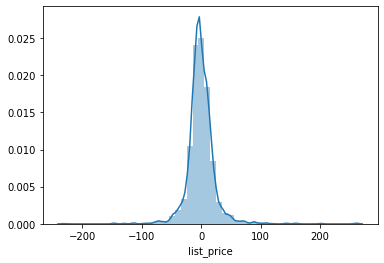

In [102]:
sns.distplot(residuals)
plt.show()

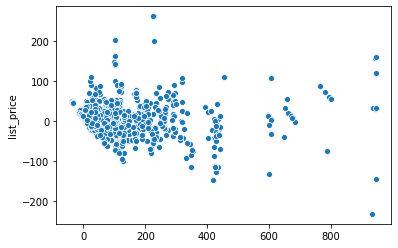

In [104]:
sns.scatterplot(y_hat, residuals)
plt.show()

In [101]:
x = df_new.drop("list_price", axis=1)
y = df_new['list_price']
pf = PolynomialFeatures(2) #Degree 2, theta0, x0, x1,x2
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print("MSE = {} \n R2 = {}".format(mean_squared_error(y_test, y_hat), r2_score(y_test, y_hat)))
residuals = y_test - y_hat

MSE = 574.7019177046814 
 R2 = 0.9342609895067812


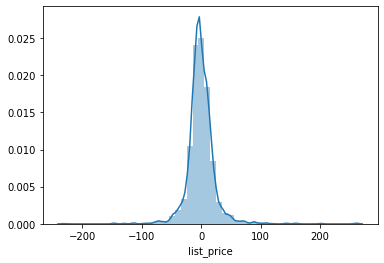

In [105]:
sns.distplot(residuals)
plt.show()

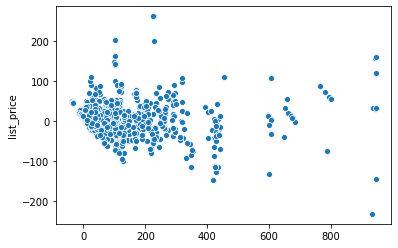

In [106]:
sns.scatterplot(y_hat, residuals)
plt.show()